In [3]:
import pandas as pd
df = pd.read_csv("../data/311_manhattan.csv")
print(df.shape)
df.head()

(1000, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-11T01:36:09.000,Noise - Residential,Loud Music/Party,MANHATTAN,40.823974,-73.950550,WEST 142 STREET
1,2025-10-11T01:35:49.000,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
2,2025-10-11T01:34:38.000,Illegal Parking,Blocked Hydrant,MANHATTAN,40.787913,-73.973443,WEST 87 STREET
3,2025-10-11T01:31:24.000,Drinking,In Public,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
4,2025-10-11T01:31:07.000,Noise - Street/Sidewalk,Loud Talking,MANHATTAN,40.724370,-73.975518,AVENUE D


In [4]:
# View general info about the dataframe
df.info()

# Count missing values per column
print("\nMissing values per column:")
print(df.isna().sum())

# Basic numeric stats (latitude, longitude)
print("\nDescriptive stats:")
print(df.describe())

# Check a few sample rows
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_date    1000 non-null   object 
 1   complaint_type  1000 non-null   object 
 2   descriptor      975 non-null    object 
 3   borough         1000 non-null   object 
 4   latitude        992 non-null    float64
 5   longitude       992 non-null    float64
 6   street_name     976 non-null    object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB

Missing values per column:
created_date       0
complaint_type     0
descriptor        25
borough            0
latitude           8
longitude          8
street_name       24
dtype: int64

Descriptive stats:
         latitude   longitude
count  992.000000  992.000000
mean    40.784156  -73.965123
std      0.043811    0.024484
min     40.702384  -74.021232
25%     40.749237  -73.986331
50%     40.784454  -73.962546
75%     40.819249  

,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-11T01:36:09.000,Noise - Residential,Loud Music/Party,MANHATTAN,40.823974,-73.950550,WEST 142 STREET
1,2025-10-11T01:35:49.000,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
2,2025-10-11T01:34:38.000,Illegal Parking,Blocked Hydrant,MANHATTAN,40.787913,-73.973443,WEST 87 STREET
3,2025-10-11T01:31:24.000,Drinking,In Public,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
4,2025-10-11T01:31:07.000,Noise - Street/Sidewalk,Loud Talking,MANHATTAN,40.724370,-73.975518,AVENUE D


In [5]:
# See the most frequent complaint types
print("\nTop complaint types:")
print(df['complaint_type'].value_counts().head(20))

# Explore descriptors for 'Illegal Parking' complaints
print("\nDescriptors for 'Illegal Parking':")
print(df.loc[df['complaint_type'].str.contains("Illegal Parking", case=False, na=False), 'descriptor'].value_counts().head(20))



Top complaint types:
complaint_type
Noise - Street/Sidewalk       162
Noise - Residential           161
Noise - Commercial             62
Illegal Parking                59
HEAT/HOT WATER                 52
Noise - Helicopter             37
UNSANITARY CONDITION           31
Noise - Vehicle                27
Noise                          26
PAINT/PLASTER                  20
Homeless Person Assistance     19
Encampment                     17
Water System                   16
Street Condition               15
Taxi Complaint                 14
Noise - Park                   14
Vendor Enforcement             12
Drinking                       12
Dirty Condition                11
PLUMBING                       11
Name: count, dtype: int64

Descriptors for 'Illegal Parking':
descriptor
Blocked Hydrant                   17
Posted Parking Sign Violation     16
Blocked Bike Lane                  8
Double Parked Blocking Traffic     5
Parking Permit Improper Use        3
Double Parked Blocking Ve

In [6]:
truck_related = [
    'Illegal Parking',
    'Blocked Driveway',
    'Blocked Sidewalk',
    'Blocked Crosswalk',
    'Commercial Overnight Parking',
    'Double Parked Commercial Vehicle'
]

df_truck = df[df['complaint_type'].isin(truck_related)].copy()

print("Total truck-related complaints:", len(df_truck))
print("\nComplaint types included:")
print(df_truck['complaint_type'].value_counts())


Total truck-related complaints: 61

Complaint types included:
complaint_type
Illegal Parking     59
Blocked Driveway     2
Name: count, dtype: int64


In [8]:
keywords = ['truck', 'delivery', 'commercial', 'double park', 'loading']
mask = (
    df['complaint_type'].str.lower().str.contains('|'.join(keywords), na=False) |
    df['descriptor'].str.lower().str.contains('|'.join(keywords), na=False)
)
df_truck_kw = df[mask].copy()

print("Total complaints after keyword filtering:", len(df_truck_kw))
df_truck_kw['complaint_type'].value_counts().head(10)


Total complaints after keyword filtering: 99


complaint_type
Noise - Commercial               62
Noise - Vehicle                  23
Illegal Parking                   9
Commercial Disposal Complaint     3
Noise                             2
Name: count, dtype: int64

In [9]:
df_truck_kw.to_csv("../data/311_truck_filtered.csv", index=False)

In [10]:
df_truck_filtered = pd.read_csv("../data/311_truck_filtered.csv")
print(df_truck_filtered.shape)
df_truck_filtered.head()

(99, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-11T01:29:21.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.815619,-73.943483,ADAM CLAYTON POWELL BOULEVARD
1,2025-10-11T01:25:01.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.809210,-73.944449,LENOX AVENUE
2,2025-10-11T01:20:46.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.761495,-73.963704,2 AVENUE
3,2025-10-11T01:17:56.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.722731,-73.989610,ELDRIDGE STREET
4,2025-10-11T01:14:09.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.755894,-73.967793,2 AVENUE


In [11]:
print("\nUnique complaint types:")
print(df_truck_filtered['complaint_type'].unique())

print("\nSample descriptors:")
print(df_truck_filtered['descriptor'].dropna().unique()[:15])



Unique complaint types:
['Noise - Commercial' 'Noise - Vehicle' 'Illegal Parking' 'Noise'
 'Commercial Disposal Complaint']

Sample descriptors:
['Loud Music/Party' 'Car/Truck Music' 'Double Parked Blocking Traffic'
 'Loud Talking' 'Banging/Pounding' 'Noise, Ice Cream Truck (NR4)'
 'Commercial Overnight Parking' 'Double Parked Blocking Vehicle'
 'Waste Disposal' 'Car/Truck Horn']


In [12]:
print(f"Filtered dataset has {len(df_truck_filtered)} rows, which is {len(df_truck_filtered)/len(df)*100:.2f}% of the total sample.")


Filtered dataset has 99 rows, which is 9.90% of the total sample.


In [13]:
df_check = pd.read_csv("../data/311_truck_filtered.csv")

print(df_check.shape)
print("\nUnique complaint types:")
print(df_check['complaint_type'].value_counts().head(20))

print("\nSample descriptors:")
print(df_check['descriptor'].dropna().unique()[:25])


(99, 7)

Unique complaint types:
complaint_type
Noise - Commercial               62
Noise - Vehicle                  23
Illegal Parking                   9
Commercial Disposal Complaint     3
Noise                             2
Name: count, dtype: int64

Sample descriptors:
['Loud Music/Party' 'Car/Truck Music' 'Double Parked Blocking Traffic'
 'Loud Talking' 'Banging/Pounding' 'Noise, Ice Cream Truck (NR4)'
 'Commercial Overnight Parking' 'Double Parked Blocking Vehicle'
 'Waste Disposal' 'Car/Truck Horn']


In [14]:
# Start with core curb/parking complaint types
curb_related = [
    'Illegal Parking',
    'Blocked Driveway',
    'Blocked Sidewalk',
    'Blocked Crosswalk',
    'Commercial Overnight Parking',
    'Double Parked Commercial Vehicle'
]

# Keep only those complaint types first
df_curb = df[df['complaint_type'].isin(curb_related)].copy()

# Refine descriptors to capture truck/delivery issues
keywords = ['truck', 'delivery', 'commercial', 'double park', 'loading']

mask = df_curb['descriptor'].str.lower().str.contains('|'.join(keywords), na=False)
df_truck_clean = df_curb[mask].copy()

print("Total truck-related complaints after refinement:", len(df_truck_clean))
print("\nComplaint type counts:")
print(df_truck_clean['complaint_type'].value_counts())

print("\nSample descriptors:")
print(df_truck_clean['descriptor'].unique()[:15])


Total truck-related complaints after refinement: 9

Complaint type counts:
complaint_type
Illegal Parking    9
Name: count, dtype: int64

Sample descriptors:
['Double Parked Blocking Traffic' 'Commercial Overnight Parking'
 'Double Parked Blocking Vehicle']


In [15]:
df_truck_clean.to_csv("../data/311_truck_filtered_clean.csv", index=False)


In [16]:
df_verify = pd.read_csv("../data/311_truck_filtered_clean.csv")
df_verify['complaint_type'].value_counts()


complaint_type
Illegal Parking    9
Name: count, dtype: int64

In [18]:
# 1. Fetch from API once
url = (
    "https://data.cityofnewyork.us/resource/erm2-nwe9.csv?"
    "$select=created_date,complaint_type,descriptor,borough,latitude,longitude,street_name"
    "&$where=borough%3D'MANHATTAN'%20AND%20created_date%3E'2023-01-01T00:00:00'"
    "&$limit=150000"
)
df = pd.read_csv(url)

# 2. Save locally for future use
df.to_csv("../data/311_manhattan_2023_now.csv", index=False)

# 3. Next time, just load from local file
df = pd.read_csv("../data/311_manhattan_2023_now.csv")

In [19]:
df = pd.read_csv("../data/311_manhattan_2023_now.csv")
print(df.shape)
df.head()

(150000, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-12T02:49:17.000,Noise - Residential,Loud Music/Party,MANHATTAN,40.856477,-73.924777,AMSTERDAM AVENUE
1,2025-10-12T02:47:37.000,Lost Property,Electronics/Phones,MANHATTAN,40.764842,-73.980528,7 AVENUE
2,2025-10-12T02:47:00.000,Noise - Commercial,Loud Talking,MANHATTAN,40.704574,-74.010012,STONE STREET
3,2025-10-12T02:45:41.000,Noise - Residential,Loud Music/Party,MANHATTAN,40.862137,-73.926238,THAYER STREET
4,2025-10-12T02:45:23.000,Noise - Park,Loud Music/Party,MANHATTAN,40.800296,-73.952475,ST NICHOLAS AVENUE


In [20]:
df.info()
print("\nMissing values per column:")
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   created_date    150000 non-null  object 
 1   complaint_type  150000 non-null  object 
 2   descriptor      138888 non-null  object 
 3   borough         150000 non-null  object 
 4   latitude        148091 non-null  float64
 5   longitude       148091 non-null  float64
 6   street_name     143669 non-null  object 
dtypes: float64(2), object(5)
memory usage: 8.0+ MB

Missing values per column:
created_date          0
complaint_type        0
descriptor        11112
borough               0
latitude           1909
longitude          1909
street_name        6331
dtype: int64


In [21]:
print("\nTop complaint types:")
print(df['complaint_type'].value_counts().head(20))

print("\nSample descriptors for 'Illegal Parking':")
print(df.loc[df['complaint_type'] == "Illegal Parking", 'descriptor'].value_counts().head(20))



Top complaint types:
complaint_type
Noise - Street/Sidewalk       16392
Illegal Parking               14691
Noise - Residential           13180
Encampment                     8962
Homeless Person Assistance     7774
Vendor Enforcement             5519
Noise - Commercial             4749
Noise                          4611
Water System                   3708
UNSANITARY CONDITION           3568
Dirty Condition                3313
Noise - Helicopter             2911
Street Condition               2526
HEAT/HOT WATER                 2267
Noise - Vehicle                2225
For Hire Vehicle Complaint     2211
Rodent                         2084
Maintenance or Facility        1966
Traffic Signal Condition       1850
PLUMBING                       1828
Name: count, dtype: int64

Sample descriptors for 'Illegal Parking':
descriptor
Posted Parking Sign Violation     5119
Blocked Hydrant                   2240
Blocked Bike Lane                 1498
Double Parked Blocking Traffic    1279
Blocked

In [22]:
# Core complaint types for curb congestion
truck_related = [
    'Illegal Parking',
    'Blocked Driveway',
    'Blocked Sidewalk',
    'Blocked Crosswalk',
    'Commercial Overnight Parking',
    'Double Parked Commercial Vehicle'
]

# Keep only relevant complaint types
df_truck = df[df['complaint_type'].isin(truck_related)].copy()

# Refine further by descriptors that mention delivery/truck behavior
keywords = ['truck', 'delivery', 'commercial', 'double park', 'loading']
mask = df_truck['descriptor'].str.lower().str.contains('|'.join(keywords), na=False)
df_truck_clean = df_truck[mask].copy()

print("Total truck-related complaints:", len(df_truck_clean))
print(df_truck_clean['complaint_type'].value_counts().head(10))


Total truck-related complaints: 2297
complaint_type
Illegal Parking    2297
Name: count, dtype: int64


In [23]:
import os

print(os.path.exists("../data/311_truck_clean_2023_now.csv"))


False


In [24]:
import os
print(os.getcwd())

c:\Users\karan\Desktop\Important\nyc-curbside-congestion\notebooks


In [25]:
df_truck_clean.to_csv(r"../data/311_truck_clean_2023_now.csv", index=False)

In [26]:
import os
print(os.path.exists(r"../data/311_truck_clean_2023_now.csv"))

True


In [27]:
import pandas as pd
df_truck_clean = pd.read_csv(
    r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv"
)
print(df_truck_clean.shape)
df_truck_clean.head()


(2297, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-12T02:02:26.000,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.865593,-73.918107,10 AVENUE
1,2025-10-12T00:54:36.000,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.830142,-73.940074,EDGECOMBE AVENUE
2,2025-10-11T23:39:34.000,Illegal Parking,Commercial Overnight Parking,MANHATTAN,40.741590,-73.995471,WEST 20 STREET
3,2025-10-11T22:11:27.000,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.822406,-73.942227,8 AVENUE
4,2025-10-11T22:02:30.000,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.795456,-73.965628,COLUMBUS AVENUE


In [28]:
df_truck_clean['created_date'] = pd.to_datetime(df_truck_clean['created_date'], errors='coerce')
df_truck_clean['hour'] = df_truck_clean['created_date'].dt.hour
df_truck_clean['day_of_week'] = df_truck_clean['created_date'].dt.day_name()
df_truck_clean['month'] = df_truck_clean['created_date'].dt.month_name()

df_truck_clean[['created_date','hour','day_of_week','month']].head()


,created_date,hour,day_of_week,month
0,2025-10-12 02:02:26,2,Sunday,October
1,2025-10-12 00:54:36,0,Sunday,October
2,2025-10-11 23:39:34,23,Saturday,October
3,2025-10-11 22:11:27,22,Saturday,October
4,2025-10-11 22:02:30,22,Saturday,October


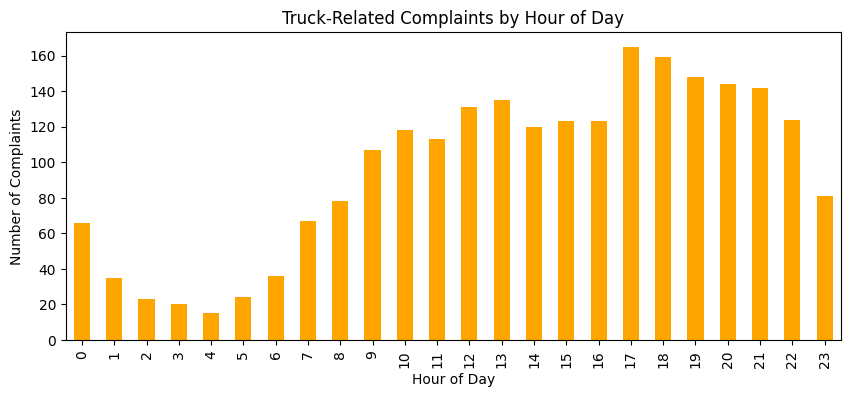

In [29]:
import matplotlib.pyplot as plt

df_truck_clean['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4), color='orange')
plt.title('Truck-Related Complaints by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Complaints')
plt.show()


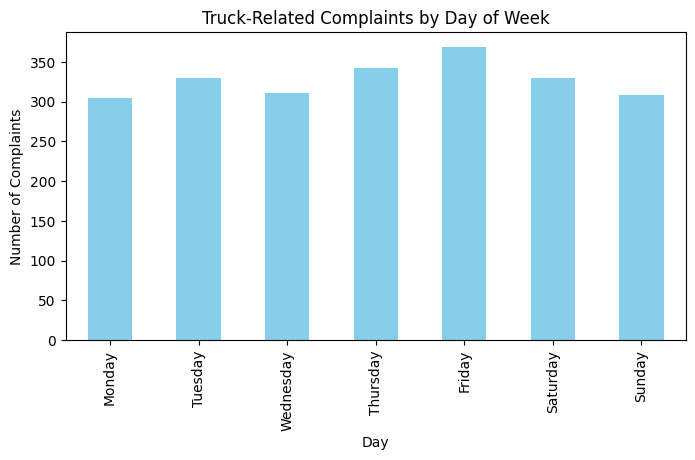

In [30]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_truck_clean['day_of_week'].value_counts().reindex(order).plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title('Truck-Related Complaints by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Complaints')
plt.show()


In [34]:
import folium

m = folium.Map(location=[40.7831, -73.9712], zoom_start=12)
m.save("../data/truck_congestion_map.html")  # open this file in your browser


In [35]:
import folium
import pandas as pd

# Load your cleaned dataset
df_truck_clean = pd.read_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv")

# Create base Manhattan map
m = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

# Add red markers for each truck complaint
for _, row in df_truck_clean.dropna(subset=['latitude','longitude']).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save to HTML and open in your browser
m.save(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\truck_points_map.html")
print("✅ Map saved! Open truck_points_map.html to view.")


✅ Map saved! Open truck_points_map.html to view.


In [36]:
from folium.plugins import HeatMap
import folium
import pandas as pd

In [37]:
# Load your clean dataset
df_truck_clean = pd.read_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv")

# Drop rows missing location data
df_heat = df_truck_clean.dropna(subset=['latitude', 'longitude'])
print("Heatmap points:", len(df_heat))


Heatmap points: 2244


In [38]:
# Create base map centered on Manhattan
m = folium.Map(location=[40.7831, -73.9712], zoom_start=12, tiles="CartoDB Positron")

# Prepare coordinates as a list of [lat, lon] pairs
heat_data = df_heat[['latitude', 'longitude']].values.tolist()

# Add the heatmap layer
HeatMap(
    heat_data,
    radius=8,        # controls how large each point appears
    blur=10,         # smooths the edges of heat spots
    max_zoom=13,     # how detailed zooming gets
    min_opacity=0.4  # transparency level
).add_to(m)

# Save to HTML so you can open it
m.save(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\truck_congestion_heatmap.html")
print("✅ Heatmap saved! Open 'truck_congestion_heatmap.html' to view it.")


✅ Heatmap saved! Open 'truck_congestion_heatmap.html' to view it.


In [39]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data (use your clean dataset)
df = pd.read_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv")

# Keep only rows with coordinates
coords = df.dropna(subset=['latitude', 'longitude'])[['latitude', 'longitude']].values

# Standardize coordinates for clustering
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)


In [40]:
# Run DBSCAN
db = DBSCAN(eps=0.05, min_samples=20).fit(coords_scaled)

# Add cluster labels to dataframe
df_clustered = df.dropna(subset=['latitude', 'longitude']).copy()
df_clustered['cluster'] = db.labels_


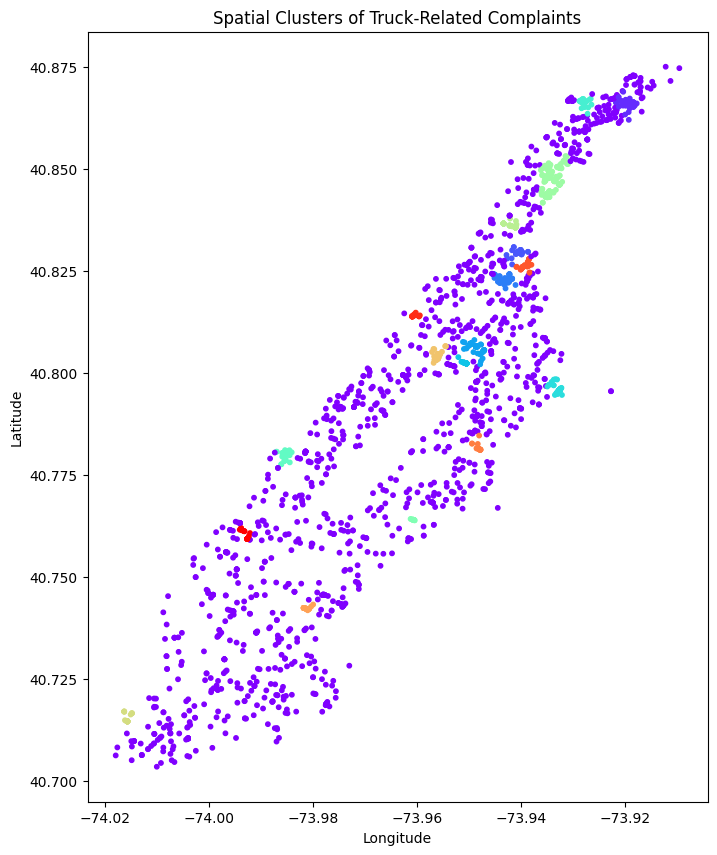

In [41]:
plt.figure(figsize=(8, 10))
plt.scatter(
    df_clustered['longitude'],
    df_clustered['latitude'],
    c=df_clustered['cluster'],
    cmap='rainbow',
    s=10
)
plt.title("Spatial Clusters of Truck-Related Complaints")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [42]:
print(df_clustered['cluster'].value_counts())
print("Number of clusters (excluding noise):", len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))


cluster
-1     1338
 3      164
 9      115
 5       86
 0       59
 12      58
 4       57
 1       53
 10      48
 2       44
 13      30
 15      29
 11      27
 7       27
 6       24
 14      24
 8       21
 16      20
 17      20
Name: count, dtype: int64
Number of clusters (excluding noise): 18


In [43]:
df_clustered['cluster'].value_counts().head(10)

cluster
-1     1338
 3      164
 9      115
 5       86
 0       59
 12      58
 4       57
 1       53
 10      48
 2       44
Name: count, dtype: int64

In [44]:
df_clustered.to_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clusters.csv", index=False)
print("✅ Saved clustered dataset successfully.")

✅ Saved clustered dataset successfully.
